<a href="https://colab.research.google.com/github/FelixHAUD/FelixHAUD/blob/main/ecommerce_eda_mgmt172.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sourcing the data**

The data is being taken from [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YGLYDY).

# **The Imports**

First, the proper imports are needed and laid out. We'll be using pandas, numpy, matplotlib, datetime, and seaborn. These may not be installed, so use pip install to ensure that it is. If you do have it installed, it will note "Requirement already satistifed:".


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.core.common.is_list_like = pd.api.types.is_list_like
%matplotlib inline


# **Reading the data**

Depending on how you do this, it may be different. If you are using a normal filesystem and not google colab, just use the file path. Note: you may have to add ./ even if its in the same folder.  

If you are using Google Colab, import the drive and mount the drive and follow and type the path manually. Note: you only have to mount the drive once, hence the separate code section.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
amazon_purchases = pd.read_csv('/content/drive/MyDrive/MGMT 172 Team Folder/Final Project/dataverse_files/amazon-purchases.csv')
fields = pd.read_csv('/content/drive/MyDrive/MGMT 172 Team Folder/Final Project/dataverse_files/fields.csv')
survey = pd.read_csv('/content/drive/MyDrive/MGMT 172 Team Folder/Final Project/dataverse_files/survey.csv')


In [4]:
# If you wish to view samples of the CSVs...

amazon_purchases.head(20)
fields.head()
# survey.head()

,Unnamed: 0,fields
0,Survey ResponseID,Response ID
1,Q-demos-age,What is your age group?
2,Q-demos-hispanic,"Are you of Spanish, Hispanic, or Latino origin?"
3,Q-demos-race,Choose one or more races that you consider you...
4,Q-demos-education,What is the highest level of education you hav...


# **Cleaning and combining data**

Now, depending on what the goal is, we have to combine and clean the CSV files.

In [5]:
df = amazon_purchases.merge(survey, on="Survey ResponseID", how='left')

# The CSV does not have dates converted to datetime format so we have to clean it here.
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# This is just making it easier to sort the seasons
def sort_by_szn(m):
  if m in [12, 1, 2]:
    return 'Winter'
  elif m in [3, 4, 5]:
    return 'Spring'
  elif m in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

# Map the season to which month it is
# Future note: Here you could also do this according to date, say like Christmas...
df['Season'] = df['Order Date'].dt.month.map(sort_by_szn)
df.head(20)

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Q-demos-age,Q-demos-hispanic,...,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Season
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
5,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
6,2019-02-18,4.99,1.0,NJ,Amazon Basics USB 2.0 Charger Cable - A-Male t...,B00NH13S44,COMPUTER_ADD_ON,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Winter
7,2019-03-15,124.99,1.0,NJ,"Fire HD 8 Tablet (8"" HD Display, 32 GB, withou...",B077H6L7T9,AMAZON_TABLET,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Spring
8,2019-04-23,12.99,1.0,NJ,"Men's Leather Belt, Ratchet Dress Belt with Au...",B07L84ZZXC,APPAREL_BELT,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Spring
9,2019-04-23,24.69,1.0,NJ,NaN,B06XKNWJN2,NaN,R_01vNIayewjIIKMF,35 - 44 years,Yes,...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes,Spring


# **Overall Topic**

Our team chose to analyze the 2018-2022 seasonal product performance on Amazon by examining trends across their different product categories and consumer demographics. Seasonality plays a significant role in consumer behavior and market trends. Certain products and industries experience increased demand during specific seasons and holidays. Understanding these seasonal patterns can help businesses adjust their strategies.

# **Questions**

Which products exhibit seasonal purchasing patterns?

In [6]:
# df['Season'].value_counts()
season_cols = ['Fall','Spring','Summer','Winter']
# This is done considering quantity
pivot_quantity = df.pivot_table(
    index=['ASIN/ISBN (Product Code)'],
    columns='Season',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

pivot_quantity['CV_SCORE'] = pivot_quantity.std(axis=1) / pivot_quantity.mean(axis=1)

# Filter out low value products (not enough sales or not sold through enough seasons to cross check)
min_total = 10
min_seasons = 2
mask_quantity = (
    (pivot_quantity.sum(axis=1)      >= min_total) &
    (pivot_quantity[season_cols].gt(0).sum(axis=1) >= min_seasons)
)
pivot_filtered_total = pivot_quantity[mask_quantity].copy()
# CV values of 2.0 indicate that there is a heavy lean towards certain seasons essentially
pivot_filtered_total = pivot_filtered_total.sort_values(by='CV_SCORE', ascending=False)

# Merged the title in as well just so it is easier to know what the product is
# also gets rid of duplicates
pivot_filtered_total = pivot_filtered_total.merge(df[['ASIN/ISBN (Product Code)', 'Title']].drop_duplicates(subset=['ASIN/ISBN (Product Code)']), on='ASIN/ISBN (Product Code)', how='left')
pivot_filtered_total.head(20)

,ASIN/ISBN (Product Code),Fall,Spring,Summer,Winter,CV_SCORE,Title
0,B093RV4X4Z,0.0,102.0,0.0,1.0,1.974195,Growing Up in a Pandemic
1,B08CYVLD85,1.0,0.0,0.0,66.0,1.960401,Amazon eGift Card - Decorated Tree
2,B09F1XPPHH,1.0,0.0,0.0,49.0,1.947032,Amazon.com eGift Card
3,B07BHKP8C9,0.0,34.0,1.0,0.0,1.924564,Amazon.com eGift Card
4,B00GHNJ1HC,0.0,1.0,0.0,31.0,1.917572,"EO Products Hand Sanitizer Spray for Everyone,..."
5,B01KIG1O8W,0.0,2.0,1.0,91.0,1.915209,Baby Proofing Cabinet Locks for Babies [12 Pac...
6,B071R3H9WB,1.0,0.0,0.0,30.0,1.914945,"Casio FX 260 Solar II Scientific Calculator 5""..."
7,B01N5DIRSF,24.0,0.0,0.0,1.0,1.894835,La Colombe Vanilla Draft Latte - 9 Fluid Ounce...
8,B08YP5MKY4,24.0,0.0,0.0,1.0,1.894835,"Kasa Smart Bulb, Dimmable Color Changing Light..."
9,B07YJFWNBR,0.0,0.0,1.0,24.0,1.894835,Amazon.com eGift Card


In [7]:
df = df.assign(
    _revenue = df['Quantity'] * df['Purchase Price Per Unit']
)

# This is done considering revenue
pivot_revenue = pd.pivot_table(
    df,
    index='ASIN/ISBN (Product Code)',
    columns='Season',
    values='_revenue',
    aggfunc='sum',
    fill_value=0
)

pivot_revenue['CV_SCORE'] = pivot_revenue.std(axis=1) / pivot_revenue.mean(axis=1)

# Filter out low value products (not enough sales or not sold through enough seasons to cross check)
min_revenue = 100
min_seasons = 2
mask_revenue = (
    (pivot_revenue.sum(axis=1)      >= min_revenue) &
    (pivot_revenue[season_cols].gt(0).sum(axis=1) >= min_seasons)
)
pivot_revenue_filtered_total = pivot_revenue[mask_revenue].copy()
# CV values of 2.0 indicate that there is a heavy lean towards certain seasons essentially
pivot_revenue_filtered_total = pivot_revenue_filtered_total.sort_values(by='CV_SCORE', ascending=False)

# Merged the title in as well just so it is easier to know what the product is
# also gets rid of duplicates
pivot_revenue_filtered_total = pivot_revenue_filtered_total.merge(df[['ASIN/ISBN (Product Code)', 'Title']].drop_duplicates(subset=['ASIN/ISBN (Product Code)']), on='ASIN/ISBN (Product Code)', how='left')


pivot_revenue_filtered_total.head(20)

,ASIN/ISBN (Product Code),Fall,Spring,Summer,Winter,CV_SCORE,Title
0,B0871WS93H,231.99,0.00,0.00,0.13,1.998507,"WestForce Electric Pressure Washer, 3000 PSI 1..."
1,B07YJFWNBR,0.00,0.00,1.00,1346.96,1.998022,Amazon.com eGift Card
2,B07HHVR8RR,0.00,1.00,0.00,685.00,1.996115,Amazon.com eGift Card
3,B094Q7RNLV,0.00,1.00,355.00,0.00,1.992516,Amazon.com eGift Card
4,B09F1S3QVS,138.02,1.00,0.00,0.00,1.980865,Amazon.com eGift Card
5,B09DCN7KLZ,0.00,1.00,0.00,100.00,1.973686,Amazon.com eGift Card
6,B0001TJ0WE,0.00,0.00,11.19,962.90,1.969485,"Herbal Conditioner for Normal Hair, with botan..."
7,B09BQRTGV6,2.00,0.00,120.00,0.00,1.956528,Amazon.com eGift Card
8,B08CZ2SGBF,10.00,0.00,0.00,585.00,1.955439,Amazon.com eGift Card
9,B09F1SDFQ3,3.00,0.00,0.00,156.18,1.950066,Amazon.com eGift Card


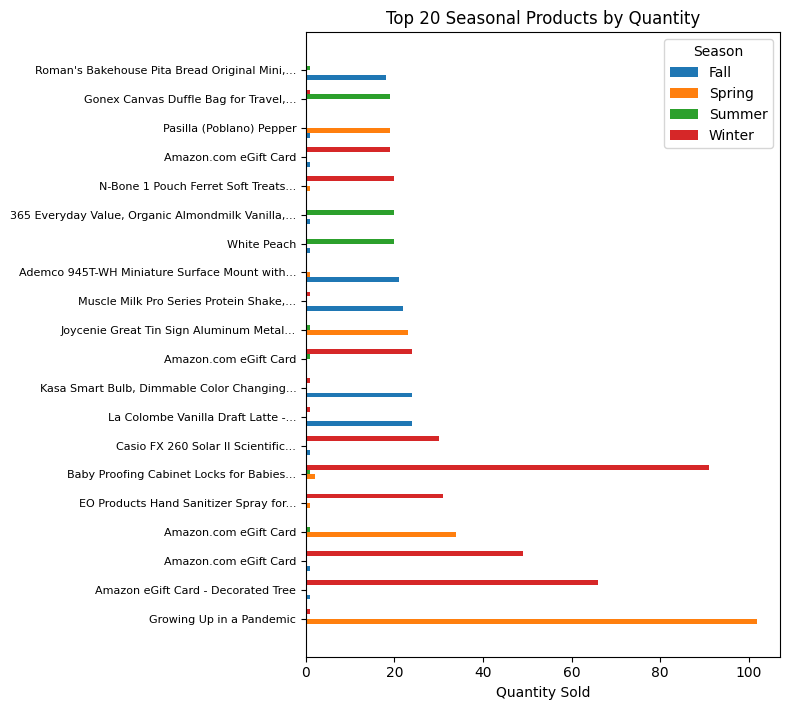

In [8]:
top_n = 20 # Change this to see as many products as you want

qty_pivot = pivot_filtered_total.copy().head(20)
rev_pivot = pivot_revenue_filtered_total.copy().head(20)

# Shortens the title so that on the charts everything fits nicely
def truncate_title(title, n_words=6):
    words = title.split()
    if len(words) <= n_words:
        return title
    return ' '.join(words[:n_words]) + '...'

titles = qty_pivot['Title'].tolist()
titles = [truncate_title(title) for title in titles] # Calls the function in a list comprehension

n_products = len(qty_pivot)
# Array of evenly spaced values
x = np.arange(n_products) # makes it so that there will be certain amount of columns
height = 0.2

cluster_height = height * 4 # 4 Seasons
gap = 0.4
cluster_pos = np.arange(n_products) * (cluster_height + gap)

# Initialized the actual chart
fig, ax = plt.subplots(figsize=(8, n_products * (cluster_height + gap) * 0.3))
for i, szn in enumerate(season_cols):
    ax.barh(cluster_pos + i * height, qty_pivot[szn], height, label=szn)

tick_positions = cluster_pos + (cluster_height / 2) - (height / 2)
ax.set_yticks(tick_positions)
ax.set_yticklabels(titles, fontsize=8)

ax.set_xlabel('Quantity Sold')
ax.set_title(f'Top {n_products} Seasonal Products by Quantity')
ax.legend(title='Season', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


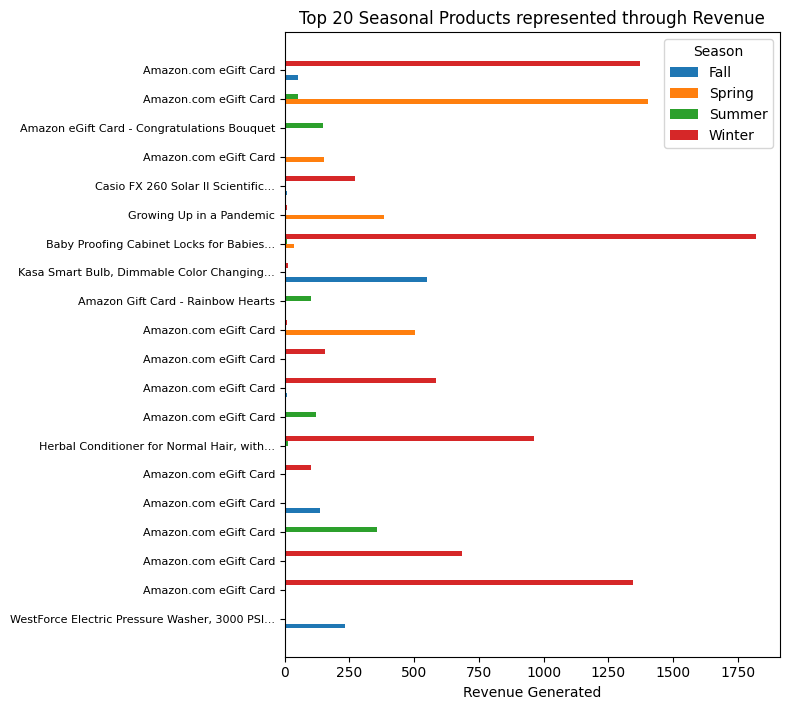

In [34]:
# Repeating the same activity but by revenue

rev_titles = rev_pivot['Title'].tolist()
rev_titles = [truncate_title(title) for title in rev_titles]

fig, bx = plt.subplots(figsize=(8, n_products * (cluster_height + gap) * 0.3))
for i, szn in enumerate(season_cols):
    bx.barh(cluster_pos + i * height, rev_pivot[szn], height, label=szn)
tick_positions = cluster_pos + (cluster_height / 2) - (height / 2)
bx.set_yticks(tick_positions)
bx.set_yticklabels(rev_titles, fontsize=8)

bx.set_xlabel('Revenue Generated')
bx.set_title(f'Top {n_products} Seasonal Products represented through Revenue')
bx.legend(title='Season', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Next on the list:

Now that we've found the products that perform seasonally, let's look at which products are in the:

**Fall
Spring
Summer
Winter**

In [10]:
# Find the top 5 products doing the best in each season

qty_long = pivot_filtered_total.copy()[['ASIN/ISBN (Product Code)', 'Title'] + season_cols]
qty_long = qty_long.melt(id_vars=['ASIN/ISBN (Product Code)', 'Title'],
              value_vars=season_cols,
              var_name = 'Season',
              value_name='Quantity',
              )
top5_qty = (
    qty_long
      .groupby('Season', group_keys=False)
      .apply(lambda x: x.nlargest(5, 'Quantity'))
      .reset_index(drop=True)
)
top5_qty

<ipython-input-10-63e2b4235937>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Quantity'))


,ASIN/ISBN (Product Code),Title,Season,Quantity
0,B086KKT3RX,Amazon Reload,Fall,2287.0
1,B00IX1I3G6,Amazon.com Gift Card Balance Reload,Fall,2094.0
2,B079NF2NFW,Photo Prints – Glossy – Standard Size (4x5.3),Fall,457.0
3,B07PCMWTSG,Amazon.com eGift Card,Fall,371.0
4,B0711H8L7V,Photo Prints – Glossy – Standard Size (4x6),Fall,330.0
5,B00IX1I3G6,Amazon.com Gift Card Balance Reload,Spring,3062.0
6,B086KKT3RX,Amazon Reload,Spring,975.0
7,B0711H8L7V,Photo Prints – Glossy – Standard Size (4x6),Spring,525.0
8,B07PCMWTSG,Amazon.com eGift Card,Spring,416.0
9,B004LLIKVU,Amazon.com eGift Card,Spring,378.0


In [11]:
# Same as above, but using revenue as a measurement.

rev_long = pivot_revenue_filtered_total.copy()[['ASIN/ISBN (Product Code)', 'Title'] + season_cols]
rev_long = rev_long.melt(id_vars=['ASIN/ISBN (Product Code)', 'Title'],
              value_vars=season_cols,
              var_name = 'Season',
              value_name='Revenue',
              )
top5_rev = (
    rev_long
      .groupby('Season', group_keys=False)
      .apply(lambda x: x.nlargest(5, 'Revenue'))
      .reset_index(drop=True)
)
top5_rev

<ipython-input-11-71cccb66c05a>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Revenue'))


,ASIN/ISBN (Product Code),Title,Season,Revenue
0,B00IX1I3G6,Amazon.com Gift Card Balance Reload,Fall,50031.46
1,B086KKT3RX,Amazon Reload,Fall,42639.82
2,B09BZ4VF5R,Amazon.com eGift Card,Fall,17335.00
3,B07PXGQC1Q,Apple AirPods (2nd Generation) Wireless Earbud...,Fall,15734.28
4,B07PCMWTSG,Amazon.com eGift Card,Fall,15524.37
5,B00IX1I3G6,Amazon.com Gift Card Balance Reload,Spring,64481.06
6,B086KKT3RX,Amazon Reload,Spring,20481.48
7,B07PCMWTSG,Amazon.com eGift Card,Spring,10568.45
8,B004LLIKVU,Amazon.com eGift Card,Spring,10447.26
9,B074T91QTZ,Google Play gift code - give the gift of games...,Spring,7824.54


Create a loop to create all the tables in one ago considering that they are all similar formats!

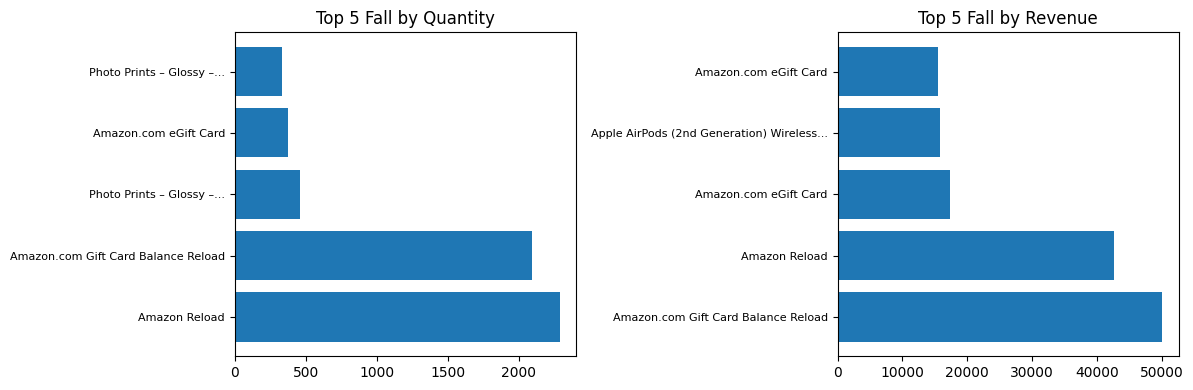

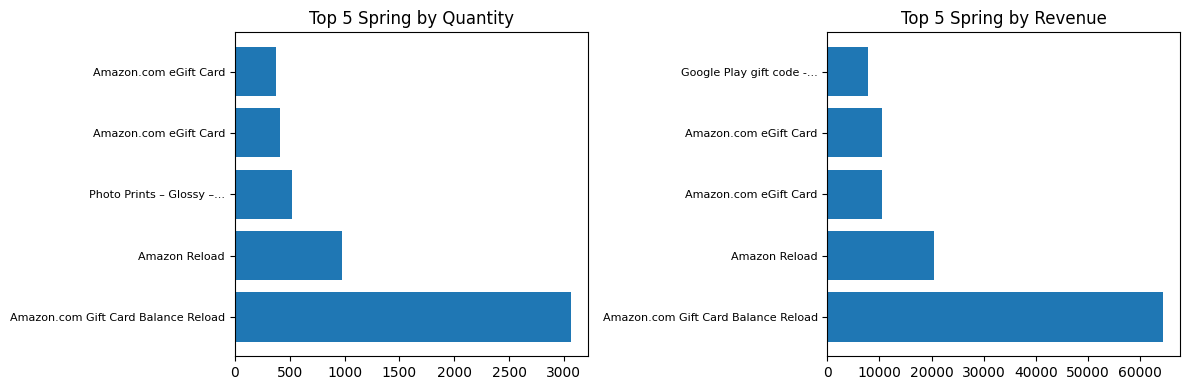

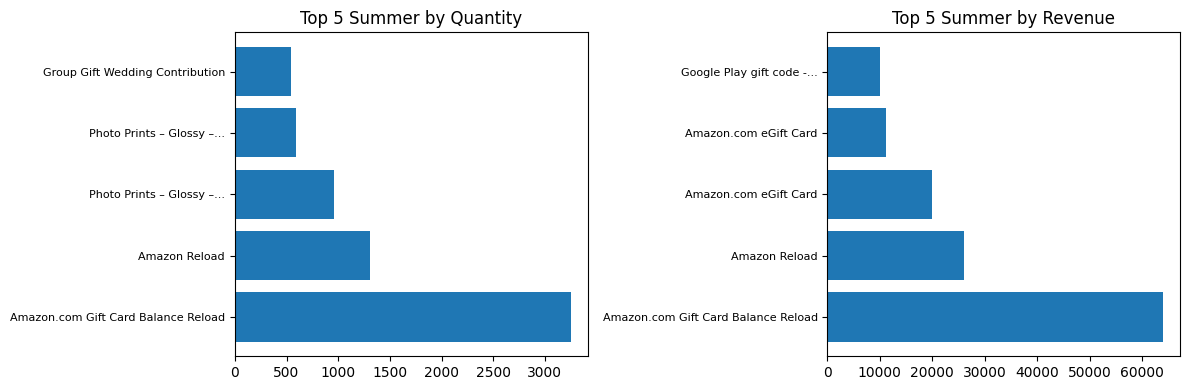

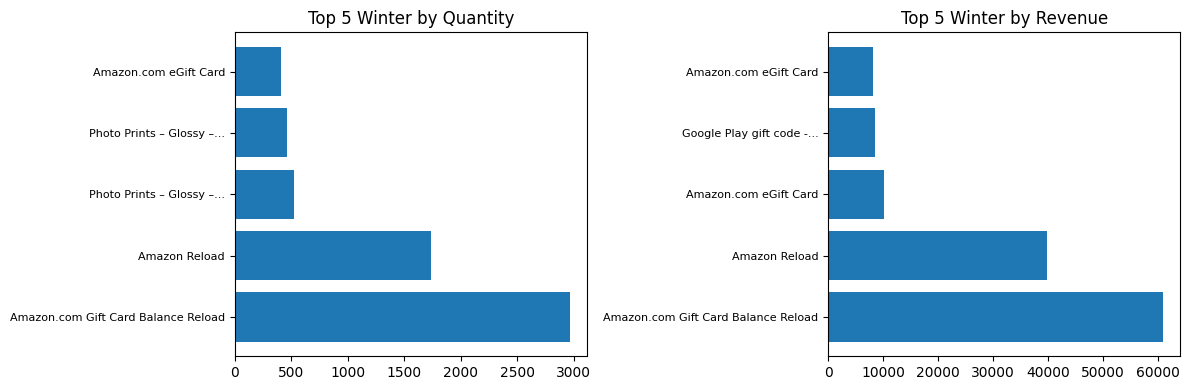

In [12]:
set_bars = 5 # If you happen to take more products above and they have the same name, you need to adjust this as well
for season in season_cols:
  y = np.arange(set_bars)

  df_qty = top5_qty[top5_qty['Season'] == season].copy()
  df_rev = top5_rev[top5_rev['Season'] == season].copy()

  df_qty['ShortTitle'] = df_qty['Title'].apply(lambda t: truncate_title(t, n_words=5))
  df_rev['ShortTitle'] = df_rev['Title'].apply(lambda t: truncate_title(t, n_words=5))

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
  ax1.barh(y, df_qty['Quantity'], height=0.8)
  ax1.set_yticks(y)
  ax1.set_yticklabels(df_qty['ShortTitle'], fontsize=8)
  ax1.set_title(f"Top 5 {season} by Quantity")

  ax2.barh(y, df_rev['Revenue'], height=0.8)
  ax2.set_yticks(y)
  ax2.set_yticklabels(df_rev['ShortTitle'], fontsize=8)
  ax2.set_title(f"Top 5 {season} by Revenue")

  fig.tight_layout()
  plt.show()



# Why are these products specifically trending?


---



---


Now we're going to check if across the demographic data that was provided by the harvard dataset. This could provide some insights on why certain products are being pushed so hard.

# First we'll take a look based on age demographics.


In [58]:
def get_column_label_for_demographic(demographic):
    lookup = {
      "Age Group": "Q-demos-age",
      "Income Bracket": "Q-demos-income",
      "Gender": "Q-demos-gender",
      "Sexual Orientation": "Q-sexual-orientation",
      "Education Level": "Q-demos-education",
      "State": "Q-demos-state"
    }
    try:
        return lookup[demographic]
    except KeyError:
        raise ValueError(f"Unknown demographic “{demographic}”")

In [40]:
df = df.assign(_revenue = df['Quantity'] * df['Purchase Price Per Unit'])
# So that there is a title in the table for readability
title_map = (
    df[['ASIN/ISBN (Product Code)', 'Title']]
      .drop_duplicates(subset='ASIN/ISBN (Product Code)')
      .set_index('ASIN/ISBN (Product Code)')['Title']
)
# season_cols defined as [summer, fall...]
def demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic=None):
  demographic_column_label = get_column_label_for_demographic(demographic)
  for season in season_cols:
    print(f"\n---- {season} Demographic Breakdown ----\n")

    top_asins_qty = top5_qty[top5_qty['Season']==season]['ASIN/ISBN (Product Code)']
    top_asins_rev = top5_rev[top5_rev['Season']==season]['ASIN/ISBN (Product Code)']

    df_season_qty = df[(df['Season']==season) & df['ASIN/ISBN (Product Code)'].isin(top_asins_qty)]

    df_season_rev = df[(df['Season']==season) & df['ASIN/ISBN (Product Code)'].isin(top_asins_rev)]
    d_qty = (
          df_season_qty
          .groupby(['ASIN/ISBN (Product Code)', demographic_column_label])['Quantity']
          .sum()
          .unstack(fill_value=0)
      )
    d_qty['Title'] = d_qty.index.map(title_map)
    d_rev = (
          df_season_rev
          .groupby(['ASIN/ISBN (Product Code)', demographic_column_label])['_revenue']
          .sum()
          .unstack(fill_value=0)
      )
    d_rev['Title'] = d_rev.index.map(title_map)

    print(f"Quantity by {demographic}:")
    display(d_qty)
    print(f"Revenue by {demographic}:")
    display(d_rev)

    return d_qty, d_rev

age_qty, age_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Age Group")




---- Fall Demographic Breakdown ----

Quantity by Age Group:


Q-demos-age,18 - 24 years,25 - 34 years,35 - 44 years,45 - 54 years,55 - 64 years,65 and older,Title
ASIN/ISBN (Product Code),,,,,,,
B00IX1I3G6,108.0,912.0,670.0,234.0,111.0,59.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,0.0,106.0,219.0,5.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,0.0,100.0,353.0,0.0,4.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B07PCMWTSG,18.0,117.0,163.0,38.0,19.0,16.0,Amazon.com eGift Card
B086KKT3RX,145.0,914.0,716.0,305.0,165.0,42.0,Amazon Reload


Revenue by Age Group:


Q-demos-age,18 - 24 years,25 - 34 years,35 - 44 years,45 - 54 years,55 - 64 years,65 and older,Title
ASIN/ISBN (Product Code),,,,,,,
B00IX1I3G6,2949.20,15061.28,16982.58,7860.44,5006.99,2170.97,Amazon.com Gift Card Balance Reload
B07PCMWTSG,488.34,3141.81,8453.11,1608.80,1041.82,790.49,Amazon.com eGift Card
B07PXGQC1Q,2640.85,5337.78,4166.83,2539.89,939.93,109.00,Apple AirPods (2nd Generation) Wireless Earbud...
B086KKT3RX,2506.45,13900.26,15661.99,5249.59,3485.77,1835.76,Amazon Reload
B09BZ4VF5R,28.00,155.00,16907.00,245.00,0.00,0.00,Amazon.com eGift Card


<ipython-input-55-12afa2d9ac81>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


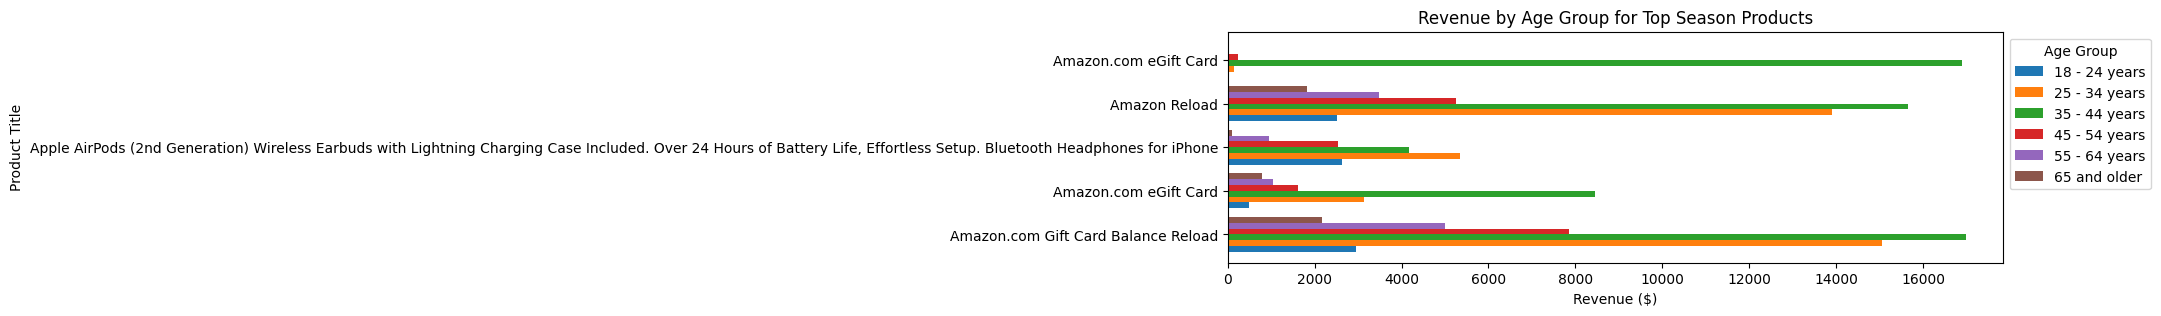

In [55]:
def plot_by_group(age_rev_df, figsize=(10, None), bar_width=0.8, value_type=None, demographic=None):
  age_rev_reset = age_rev_df.reset_index()

  plot_df = age_rev_reset.set_index('Title')

  # 3) Keep only the age‐group numeric columns for the bar chart
  age_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
  plot_df = plot_df[age_groups]

  fig, ax = plt.subplots(figsize=(10, len(plot_df)*0.4 + 1))
  plot_df.plot(kind='barh', ax=ax, width=0.8)

  xlabel = f"{value_type}" + (" ($)" if value_type == 'Revenue' else "")
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Product Title')
  ax.set_title(f'{value_type} by {demographic} for Top Season Products')
  ax.legend(title=demographic, bbox_to_anchor=(1.0, 1.0))
  return fig, ax

fig, ax = plot_by_group(age_rev, value_type="Revenue", demographic="Age Group")

plt.tight_layout()
plt.show()

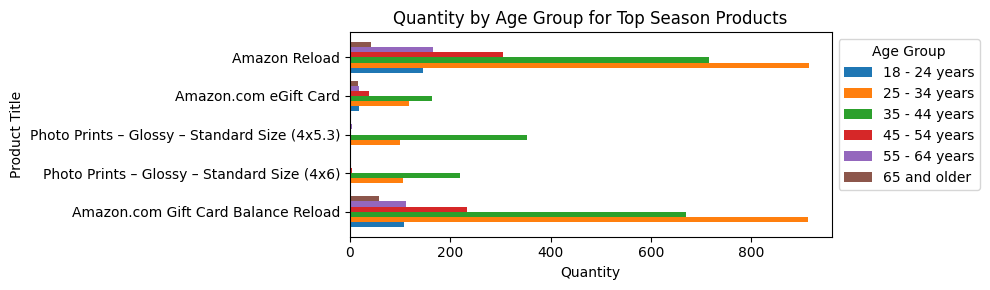

In [56]:
# age_qty_reset = age_qty.reset_index()

# plot_df = age_qty_reset.set_index('Title')

# # 3) Keep only the age‐group numeric columns for the bar chart
# age_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
# plot_df = plot_df[age_groups]

# fig, ax = plt.subplots(figsize=(10, len(plot_df)*0.4 + 1))
# plot_df.plot(kind='barh', ax=ax, width=0.8)
# ax.set_xlabel('Quantity ($)')
# ax.set_ylabel('Product Title')
# ax.set_title('Quantity by Age Group for Top Season Products')
# ax.legend(title='Age Group', bbox_to_anchor=(1.0, 1.0))
# plt.tight_layout()
# plt.show()

fig, ax = plot_by_group(age_qty, value_type="Quantity", demographic="Age Group")
plt.tight_layout()
plt.show()

# Income Charts

In [59]:
# for season in season_cols:
#     inc_qty = (
#       df_season_qty
#       .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-income'])['Quantity']
#       .sum()
#       .unstack(fill_value=0)
#     )
#     inc_qty['Title'] = inc_qty.index.map(title_map)
#     inc_rev = (
#       df_season_rev
#       .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-income'])['_revenue']
#       .sum()
#       .unstack(fill_value=0)
#     )
#     inc_rev['Title'] = inc_rev.index.map(title_map)

#     print("Quantity by Income Bracket:")
#     display(inc_qty)
#     print("Revenue by Income Bracket:")
#     display(inc_rev)

inc_qty, inc_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Income Bracket")


---- Fall Demographic Breakdown ----

Quantity by Income Bracket:


Q-demos-income,"$100,000 - $149,999","$150,000 or more","$25,000 - $49,999","$50,000 - $74,999","$75,000 - $99,999","Less than $25,000",Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,,,,
B00IX1I3G6,318.0,383.0,365.0,409.0,249.0,225.0,145.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,211.0,0.0,11.0,0.0,108.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,11.0,0.0,23.0,127.0,296.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B07PCMWTSG,51.0,125.0,58.0,55.0,29.0,46.0,7.0,Amazon.com eGift Card
B086KKT3RX,374.0,585.0,321.0,305.0,399.0,238.0,65.0,Amazon Reload


Revenue by Income Bracket:


Q-demos-income,"$100,000 - $149,999","$150,000 or more","$25,000 - $49,999","$50,000 - $74,999","$75,000 - $99,999","Less than $25,000",Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,,,,
B00IX1I3G6,11697.98,5049.83,7927.61,10879.32,8652.12,4519.16,1305.44,Amazon.com Gift Card Balance Reload
B07PCMWTSG,2142.81,7734.58,1672.27,1968.00,1395.92,490.79,120.00,Amazon.com eGift Card
B07PXGQC1Q,5539.77,2905.88,2008.94,2195.91,2244.79,838.99,0.00,Apple AirPods (2nd Generation) Wireless Earbud...
B086KKT3RX,8561.44,6229.74,8281.50,8086.45,7623.17,3603.85,253.67,Amazon Reload
B09BZ4VF5R,250.00,16855.00,5.00,105.00,120.00,0.00,0.00,Amazon.com eGift Card


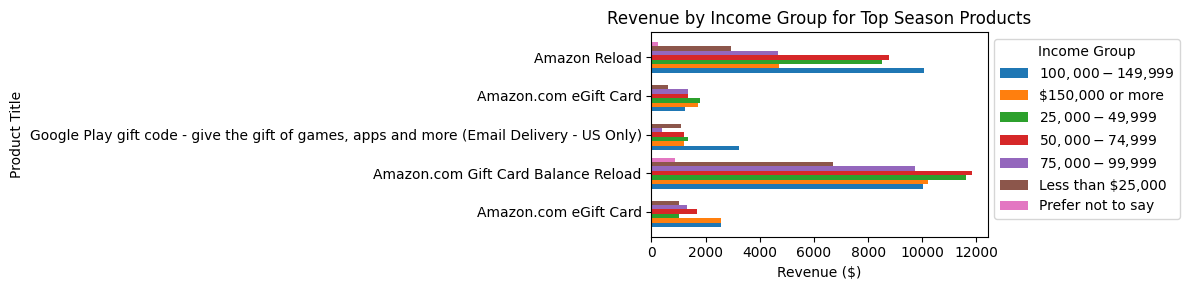

In [17]:
inc_rev_reset = inc_rev.reset_index()

plot_df = inc_rev_reset.set_index('Title')

# 3) Keep only the age‐group numeric columns for the bar chart
inc_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[inc_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Revenue ($)')
ax.set_ylabel('Product Title')
ax.set_title('Revenue by Income Group for Top Season Products')
ax.legend(title='Income Group', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

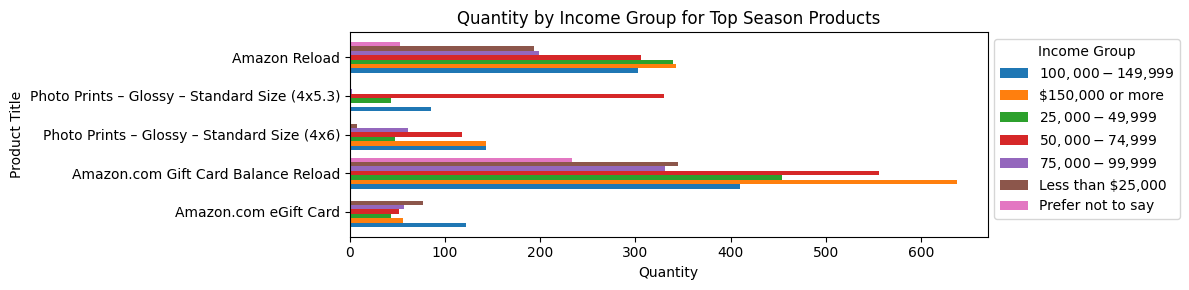

In [18]:
inc_qty_reset = inc_qty.reset_index()

plot_df = inc_qty_reset.set_index('Title')

# 3) Keep only the age‐group numeric columns for the bar chart
inc_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[inc_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Quantity')
ax.set_ylabel('Product Title')
ax.set_title('Quantity by Income Group for Top Season Products')
ax.legend(title='Income Group', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Education Charts



In [19]:
for season in season_cols:
    edu_qty = (
      df_season_qty
      .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-education'])['Quantity']
      .sum()
      .unstack(fill_value=0)
    )
    edu_qty['Title'] = edu_qty.index.map(title_map)
    edu_rev = (
      df_season_rev
      .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-education'])['_revenue']
      .sum()
      .unstack(fill_value=0)
    )
    edu_rev['Title'] = edu_rev.index.map(title_map)

    print("Quantity by Highest Education Level Reached:")
    display(edu_qty)
    print("Revenue by Highest Education Level Reached:")
    display(edu_rev)

Quantity by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,128.0,128.0,148.0,3.0,0.0,Amazon.com eGift Card
B00IX1I3G6,1398.0,578.0,917.0,12.0,62.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,132.0,328.0,60.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,7.0,210.0,243.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,788.0,366.0,555.0,3.0,25.0,Amazon Reload


Revenue by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,4152.31,3492.82,2468.68,64.12,0.00,Amazon.com eGift Card
B00IX1I3G6,28109.50,11387.96,20577.90,141.67,799.28,Amazon.com Gift Card Balance Reload
B074T91QTZ,2278.00,640.00,5087.57,455.03,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3376.54,2317.23,2262.12,75.00,50.00,Amazon.com eGift Card
B086KKT3RX,22342.66,5380.80,11834.66,51.04,308.55,Amazon Reload


Quantity by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,128.0,128.0,148.0,3.0,0.0,Amazon.com eGift Card
B00IX1I3G6,1398.0,578.0,917.0,12.0,62.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,132.0,328.0,60.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,7.0,210.0,243.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,788.0,366.0,555.0,3.0,25.0,Amazon Reload


Revenue by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,4152.31,3492.82,2468.68,64.12,0.00,Amazon.com eGift Card
B00IX1I3G6,28109.50,11387.96,20577.90,141.67,799.28,Amazon.com Gift Card Balance Reload
B074T91QTZ,2278.00,640.00,5087.57,455.03,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3376.54,2317.23,2262.12,75.00,50.00,Amazon.com eGift Card
B086KKT3RX,22342.66,5380.80,11834.66,51.04,308.55,Amazon Reload


Quantity by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,128.0,128.0,148.0,3.0,0.0,Amazon.com eGift Card
B00IX1I3G6,1398.0,578.0,917.0,12.0,62.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,132.0,328.0,60.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,7.0,210.0,243.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,788.0,366.0,555.0,3.0,25.0,Amazon Reload


Revenue by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,4152.31,3492.82,2468.68,64.12,0.00,Amazon.com eGift Card
B00IX1I3G6,28109.50,11387.96,20577.90,141.67,799.28,Amazon.com Gift Card Balance Reload
B074T91QTZ,2278.00,640.00,5087.57,455.03,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3376.54,2317.23,2262.12,75.00,50.00,Amazon.com eGift Card
B086KKT3RX,22342.66,5380.80,11834.66,51.04,308.55,Amazon Reload


Quantity by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,128.0,128.0,148.0,3.0,0.0,Amazon.com eGift Card
B00IX1I3G6,1398.0,578.0,917.0,12.0,62.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,132.0,328.0,60.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,7.0,210.0,243.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,788.0,366.0,555.0,3.0,25.0,Amazon Reload


Revenue by Highest Education Level Reached:


Q-demos-education,Bachelor's degree,"Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)",High school diploma or GED,Prefer not to say,Some high school or less,Title
ASIN/ISBN (Product Code),,,,,,
B004LLIKVU,4152.31,3492.82,2468.68,64.12,0.00,Amazon.com eGift Card
B00IX1I3G6,28109.50,11387.96,20577.90,141.67,799.28,Amazon.com Gift Card Balance Reload
B074T91QTZ,2278.00,640.00,5087.57,455.03,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3376.54,2317.23,2262.12,75.00,50.00,Amazon.com eGift Card
B086KKT3RX,22342.66,5380.80,11834.66,51.04,308.55,Amazon Reload


<ipython-input-20-0c30ce836638>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


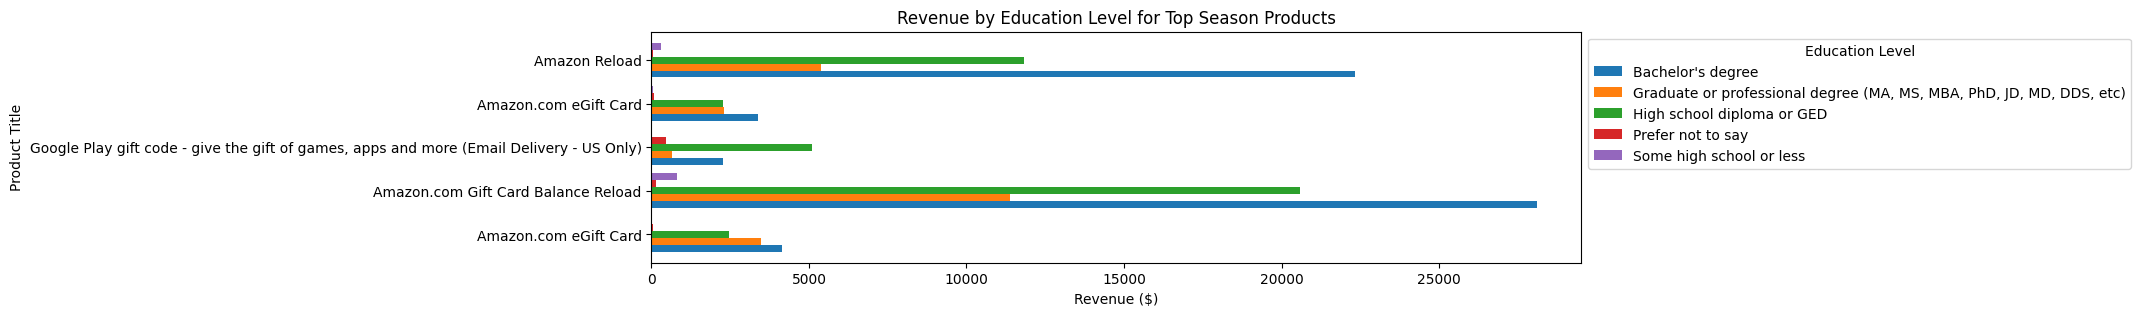

In [20]:
edu_rev_reset = edu_rev.reset_index()

plot_df = edu_rev_reset.set_index('Title')

# 3) Keep only the age‐group numeric columns for the bar chart
edu_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[edu_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Revenue ($)')
ax.set_ylabel('Product Title')
ax.set_title('Revenue by Education Level for Top Season Products')
ax.legend(title='Education Level', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

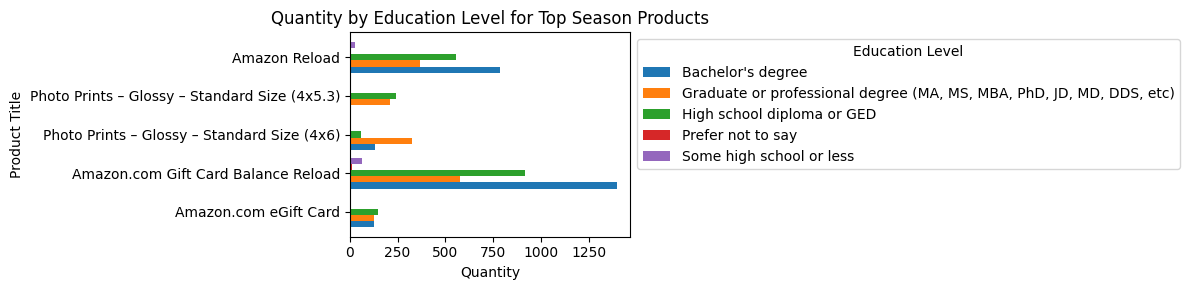

In [21]:
# Education | Quantity | Chart

edu_qty_reset = edu_qty.reset_index()

plot_df = edu_qty_reset.set_index('Title')

edu_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[edu_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Quantity')
ax.set_ylabel('Product Title')
ax.set_title('Quantity by Education Level for Top Season Products')
ax.legend(title='Education Level', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Gender Charts

In [22]:
for season in season_cols:
    gender_qty = (
      df_season_qty
      .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-gender'])['Quantity']
      .sum()
      .unstack(fill_value=0)
    )
    gender_qty['Title'] = gender_qty.index.map(title_map)
    gender_rev = (
      df_season_rev
      .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-gender'])['_revenue']
      .sum()
      .unstack(fill_value=0)
    )
    gender_rev['Title'] = gender_rev.index.map(title_map)

    print("Quantity by Gender")
    display(gender_qty)
    print("Revenue by Gender")
    display(gender_rev)

Quantity by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,128.0,275.0,4.0,0.0,Amazon.com eGift Card
B00IX1I3G6,977.0,1960.0,26.0,4.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,396.0,124.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,458.0,2.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,683.0,1039.0,14.0,1.0,Amazon Reload


Revenue by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,2779.66,7294.84,103.43,0.00,Amazon.com eGift Card
B00IX1I3G6,23957.04,36373.88,556.51,128.88,Amazon.com Gift Card Balance Reload
B074T91QTZ,3757.98,4702.62,0.00,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3824.65,4034.22,222.02,0.00,Amazon.com eGift Card
B086KKT3RX,18973.94,20543.55,375.22,25.00,Amazon Reload


Quantity by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,128.0,275.0,4.0,0.0,Amazon.com eGift Card
B00IX1I3G6,977.0,1960.0,26.0,4.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,396.0,124.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,458.0,2.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,683.0,1039.0,14.0,1.0,Amazon Reload


Revenue by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,2779.66,7294.84,103.43,0.00,Amazon.com eGift Card
B00IX1I3G6,23957.04,36373.88,556.51,128.88,Amazon.com Gift Card Balance Reload
B074T91QTZ,3757.98,4702.62,0.00,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3824.65,4034.22,222.02,0.00,Amazon.com eGift Card
B086KKT3RX,18973.94,20543.55,375.22,25.00,Amazon Reload


Quantity by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,128.0,275.0,4.0,0.0,Amazon.com eGift Card
B00IX1I3G6,977.0,1960.0,26.0,4.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,396.0,124.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,458.0,2.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,683.0,1039.0,14.0,1.0,Amazon Reload


Revenue by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,2779.66,7294.84,103.43,0.00,Amazon.com eGift Card
B00IX1I3G6,23957.04,36373.88,556.51,128.88,Amazon.com Gift Card Balance Reload
B074T91QTZ,3757.98,4702.62,0.00,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3824.65,4034.22,222.02,0.00,Amazon.com eGift Card
B086KKT3RX,18973.94,20543.55,375.22,25.00,Amazon Reload


Quantity by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,128.0,275.0,4.0,0.0,Amazon.com eGift Card
B00IX1I3G6,977.0,1960.0,26.0,4.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,396.0,124.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,458.0,2.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,683.0,1039.0,14.0,1.0,Amazon Reload


Revenue by Gender


Q-demos-gender,Female,Male,Other,Prefer not to say,Title
ASIN/ISBN (Product Code),,,,,
B004LLIKVU,2779.66,7294.84,103.43,0.00,Amazon.com eGift Card
B00IX1I3G6,23957.04,36373.88,556.51,128.88,Amazon.com Gift Card Balance Reload
B074T91QTZ,3757.98,4702.62,0.00,0.00,Google Play gift code - give the gift of games...
B07PCMWTSG,3824.65,4034.22,222.02,0.00,Amazon.com eGift Card
B086KKT3RX,18973.94,20543.55,375.22,25.00,Amazon Reload


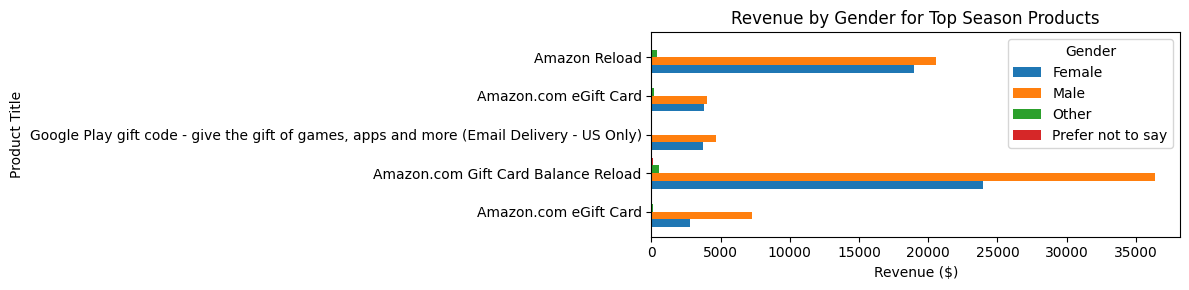

In [23]:
# Gender | Revenue | Chart

gender_rev_reset = gender_rev.reset_index()

plot_df = gender_rev_reset.set_index('Title')

gender_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[gender_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Revenue ($)')
ax.set_ylabel('Product Title')
ax.set_title('Revenue by Gender for Top Season Products')
ax.legend(title='Gender', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

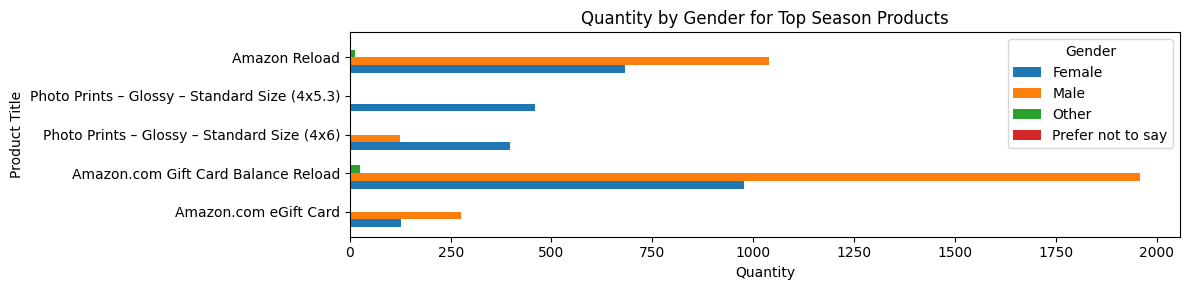

In [24]:
# Gender | Quantity | Chart

gender_qty_reset = gender_qty.reset_index()

plot_df = gender_qty_reset.set_index('Title')

gender_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[gender_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Quantity')
ax.set_ylabel('Product Title')
ax.set_title('Quantity by Gender for Top Season Products')
ax.legend(title='Gender', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Sexual Orientation Charts

In [25]:
for season in season_cols:
    orientation_qty = (
      df_season_qty
      .groupby(['ASIN/ISBN (Product Code)', 'Q-sexual-orientation'])['Quantity']
      .sum()
      .unstack(fill_value=0)
    )
    orientation_qty['Title'] = orientation_qty.index.map(title_map)
    orientation_rev = (
      df_season_rev
      .groupby(['ASIN/ISBN (Product Code)', 'Q-sexual-orientation'])['_revenue']
      .sum()
      .unstack(fill_value=0)
    )
    orientation_rev['Title'] = orientation_rev.index.map(title_map)

    print("Quantity by Sexual Orientation")
    display(orientation_qty)
    print("Revenue by Sexual Orientation")
    display(orientation_rev)

Quantity by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,37.0,369.0,1.0,Amazon.com eGift Card
B00IX1I3G6,382.0,2571.0,14.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,7.0,513.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,2.0,458.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,210.0,1496.0,31.0,Amazon Reload


Revenue by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,973.91,9179.02,25.00,Amazon.com eGift Card
B00IX1I3G6,10780.98,49087.97,1147.36,Amazon.com Gift Card Balance Reload
B074T91QTZ,856.10,7566.50,38.00,Google Play gift code - give the gift of games...
B07PCMWTSG,1287.16,6729.51,64.22,Amazon.com eGift Card
B086KKT3RX,4913.58,33790.04,1214.09,Amazon Reload


Quantity by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,37.0,369.0,1.0,Amazon.com eGift Card
B00IX1I3G6,382.0,2571.0,14.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,7.0,513.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,2.0,458.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,210.0,1496.0,31.0,Amazon Reload


Revenue by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,973.91,9179.02,25.00,Amazon.com eGift Card
B00IX1I3G6,10780.98,49087.97,1147.36,Amazon.com Gift Card Balance Reload
B074T91QTZ,856.10,7566.50,38.00,Google Play gift code - give the gift of games...
B07PCMWTSG,1287.16,6729.51,64.22,Amazon.com eGift Card
B086KKT3RX,4913.58,33790.04,1214.09,Amazon Reload


Quantity by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,37.0,369.0,1.0,Amazon.com eGift Card
B00IX1I3G6,382.0,2571.0,14.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,7.0,513.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,2.0,458.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,210.0,1496.0,31.0,Amazon Reload


Revenue by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,973.91,9179.02,25.00,Amazon.com eGift Card
B00IX1I3G6,10780.98,49087.97,1147.36,Amazon.com Gift Card Balance Reload
B074T91QTZ,856.10,7566.50,38.00,Google Play gift code - give the gift of games...
B07PCMWTSG,1287.16,6729.51,64.22,Amazon.com eGift Card
B086KKT3RX,4913.58,33790.04,1214.09,Amazon Reload


Quantity by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,37.0,369.0,1.0,Amazon.com eGift Card
B00IX1I3G6,382.0,2571.0,14.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,7.0,513.0,0.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,2.0,458.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,210.0,1496.0,31.0,Amazon Reload


Revenue by Sexual Orientation


Q-sexual-orientation,LGBTQ+,heterosexual (straight),prefer not to say,Title
ASIN/ISBN (Product Code),,,,
B004LLIKVU,973.91,9179.02,25.00,Amazon.com eGift Card
B00IX1I3G6,10780.98,49087.97,1147.36,Amazon.com Gift Card Balance Reload
B074T91QTZ,856.10,7566.50,38.00,Google Play gift code - give the gift of games...
B07PCMWTSG,1287.16,6729.51,64.22,Amazon.com eGift Card
B086KKT3RX,4913.58,33790.04,1214.09,Amazon Reload


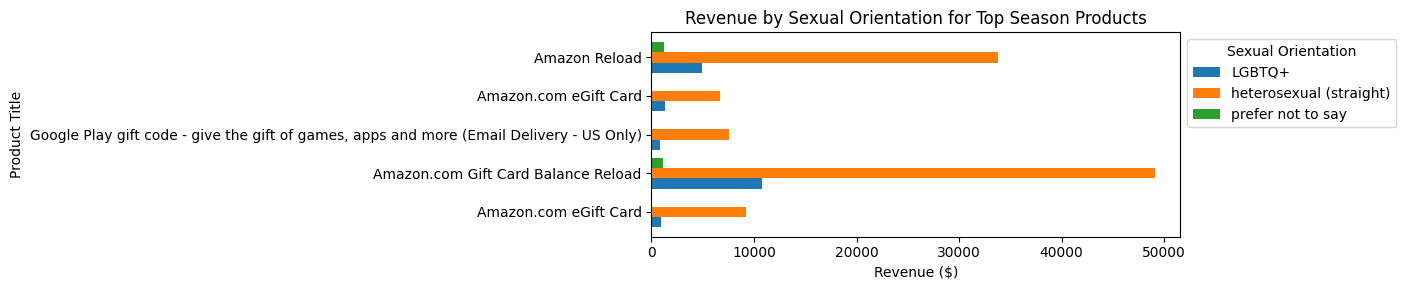

In [26]:
# Sexual Orientation | Revenue | Chart

orientation_rev_reset = orientation_rev.reset_index()

plot_df = orientation_rev_reset.set_index('Title')

orientation_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[orientation_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Revenue ($)')
ax.set_ylabel('Product Title')
ax.set_title('Revenue by Sexual Orientation for Top Season Products')
ax.legend(title='Sexual Orientation', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

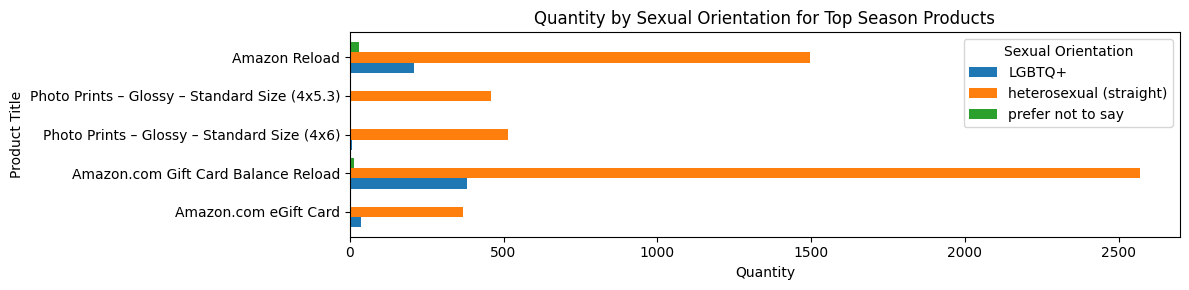

In [27]:
# Sexual Orientation | Quantity | Chart

orientation_qty_reset = orientation_qty.reset_index()

plot_df = orientation_qty_reset.set_index('Title')

orientation_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[orientation_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Quantity')
ax.set_ylabel('Product Title')
ax.set_title('Quantity by Sexual Orientation for Top Season Products')
ax.legend(title='Sexual Orientation', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# State Charts

In [28]:
for season in season_cols:
    state_qty = (
      df_season_qty
      .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-state'])['Quantity']
      .sum()
      .unstack(fill_value=0)
    )
    state_qty['Title'] = state_qty.index.map(title_map)
    state_rev = (
      df_season_rev
      .groupby(['ASIN/ISBN (Product Code)', 'Q-demos-state'])['_revenue']
      .sum()
      .unstack(fill_value=0)
    )
    state_rev['Title'] = state_rev.index.map(title_map)

    print("Quantity by State:")
    display(state_qty)
    print("Revenue by State")
    display(state_rev)

Quantity by State:


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,6.0,0.0,1.0,8.0,25.0,8.0,64.0,0.0,0.0,24.0,...,0.0,8.0,22.0,0.0,0.0,12.0,15.0,1.0,7.0,Amazon.com eGift Card
B00IX1I3G6,17.0,5.0,27.0,18.0,240.0,18.0,30.0,2.0,6.0,175.0,...,2.0,50.0,152.0,18.0,4.0,36.0,48.0,0.0,76.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,115.0,6.0,0.0,0.0,0.0,66.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,124.0,2.0,0.0,0.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,35.0,0.0,25.0,4.0,146.0,3.0,12.0,2.0,6.0,129.0,...,0.0,30.0,131.0,5.0,5.0,7.0,21.0,2.0,27.0,Amazon Reload


Revenue by State


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,118.43,0.00,5.00,201.40,828.89,263.28,1223.77,0.0,0.00,373.76,...,79.90,453.73,0.00,0.00,237.80,595.32,15.00,60.90,0.0,Amazon.com eGift Card
B00IX1I3G6,655.21,607.26,476.85,277.00,8541.42,1108.64,1972.00,50.0,83.00,4247.15,...,1124.04,2496.65,557.36,165.00,1293.12,1643.37,0.00,402.92,0.0,Amazon.com Gift Card Balance Reload
B074T91QTZ,0.00,0.00,0.00,40.00,1680.00,0.00,0.00,0.0,0.00,352.14,...,160.00,350.00,25.00,25.00,154.95,125.00,0.00,120.00,25.0,Google Play gift code - give the gift of games...
B07PCMWTSG,11.23,0.00,0.00,52.25,1248.97,0.00,0.00,0.0,0.00,326.00,...,331.00,458.65,55.00,70.00,136.46,258.13,0.00,0.00,0.0,Amazon.com eGift Card
B086KKT3RX,830.05,0.00,605.64,24.50,3627.61,168.89,529.59,108.0,59.19,2797.32,...,653.98,3310.85,303.70,95.56,165.00,602.17,38.31,826.05,0.0,Amazon Reload


Quantity by State:


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,6.0,0.0,1.0,8.0,25.0,8.0,64.0,0.0,0.0,24.0,...,0.0,8.0,22.0,0.0,0.0,12.0,15.0,1.0,7.0,Amazon.com eGift Card
B00IX1I3G6,17.0,5.0,27.0,18.0,240.0,18.0,30.0,2.0,6.0,175.0,...,2.0,50.0,152.0,18.0,4.0,36.0,48.0,0.0,76.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,115.0,6.0,0.0,0.0,0.0,66.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,124.0,2.0,0.0,0.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,35.0,0.0,25.0,4.0,146.0,3.0,12.0,2.0,6.0,129.0,...,0.0,30.0,131.0,5.0,5.0,7.0,21.0,2.0,27.0,Amazon Reload


Revenue by State


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,118.43,0.00,5.00,201.40,828.89,263.28,1223.77,0.0,0.00,373.76,...,79.90,453.73,0.00,0.00,237.80,595.32,15.00,60.90,0.0,Amazon.com eGift Card
B00IX1I3G6,655.21,607.26,476.85,277.00,8541.42,1108.64,1972.00,50.0,83.00,4247.15,...,1124.04,2496.65,557.36,165.00,1293.12,1643.37,0.00,402.92,0.0,Amazon.com Gift Card Balance Reload
B074T91QTZ,0.00,0.00,0.00,40.00,1680.00,0.00,0.00,0.0,0.00,352.14,...,160.00,350.00,25.00,25.00,154.95,125.00,0.00,120.00,25.0,Google Play gift code - give the gift of games...
B07PCMWTSG,11.23,0.00,0.00,52.25,1248.97,0.00,0.00,0.0,0.00,326.00,...,331.00,458.65,55.00,70.00,136.46,258.13,0.00,0.00,0.0,Amazon.com eGift Card
B086KKT3RX,830.05,0.00,605.64,24.50,3627.61,168.89,529.59,108.0,59.19,2797.32,...,653.98,3310.85,303.70,95.56,165.00,602.17,38.31,826.05,0.0,Amazon Reload


Quantity by State:


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,6.0,0.0,1.0,8.0,25.0,8.0,64.0,0.0,0.0,24.0,...,0.0,8.0,22.0,0.0,0.0,12.0,15.0,1.0,7.0,Amazon.com eGift Card
B00IX1I3G6,17.0,5.0,27.0,18.0,240.0,18.0,30.0,2.0,6.0,175.0,...,2.0,50.0,152.0,18.0,4.0,36.0,48.0,0.0,76.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,115.0,6.0,0.0,0.0,0.0,66.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,124.0,2.0,0.0,0.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,35.0,0.0,25.0,4.0,146.0,3.0,12.0,2.0,6.0,129.0,...,0.0,30.0,131.0,5.0,5.0,7.0,21.0,2.0,27.0,Amazon Reload


Revenue by State


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,118.43,0.00,5.00,201.40,828.89,263.28,1223.77,0.0,0.00,373.76,...,79.90,453.73,0.00,0.00,237.80,595.32,15.00,60.90,0.0,Amazon.com eGift Card
B00IX1I3G6,655.21,607.26,476.85,277.00,8541.42,1108.64,1972.00,50.0,83.00,4247.15,...,1124.04,2496.65,557.36,165.00,1293.12,1643.37,0.00,402.92,0.0,Amazon.com Gift Card Balance Reload
B074T91QTZ,0.00,0.00,0.00,40.00,1680.00,0.00,0.00,0.0,0.00,352.14,...,160.00,350.00,25.00,25.00,154.95,125.00,0.00,120.00,25.0,Google Play gift code - give the gift of games...
B07PCMWTSG,11.23,0.00,0.00,52.25,1248.97,0.00,0.00,0.0,0.00,326.00,...,331.00,458.65,55.00,70.00,136.46,258.13,0.00,0.00,0.0,Amazon.com eGift Card
B086KKT3RX,830.05,0.00,605.64,24.50,3627.61,168.89,529.59,108.0,59.19,2797.32,...,653.98,3310.85,303.70,95.56,165.00,602.17,38.31,826.05,0.0,Amazon Reload


Quantity by State:


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,6.0,0.0,1.0,8.0,25.0,8.0,64.0,0.0,0.0,24.0,...,0.0,8.0,22.0,0.0,0.0,12.0,15.0,1.0,7.0,Amazon.com eGift Card
B00IX1I3G6,17.0,5.0,27.0,18.0,240.0,18.0,30.0,2.0,6.0,175.0,...,2.0,50.0,152.0,18.0,4.0,36.0,48.0,0.0,76.0,Amazon.com Gift Card Balance Reload
B0711H8L7V,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,115.0,6.0,0.0,0.0,0.0,66.0,Photo Prints – Glossy – Standard Size (4x6)
B079NF2NFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,124.0,2.0,0.0,0.0,0.0,0.0,Photo Prints – Glossy – Standard Size (4x5.3)
B086KKT3RX,35.0,0.0,25.0,4.0,146.0,3.0,12.0,2.0,6.0,129.0,...,0.0,30.0,131.0,5.0,5.0,7.0,21.0,2.0,27.0,Amazon Reload


Revenue by State


Q-demos-state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Title
ASIN/ISBN (Product Code),,,,,,,,,,,,,,,,,,,,,
B004LLIKVU,118.43,0.00,5.00,201.40,828.89,263.28,1223.77,0.0,0.00,373.76,...,79.90,453.73,0.00,0.00,237.80,595.32,15.00,60.90,0.0,Amazon.com eGift Card
B00IX1I3G6,655.21,607.26,476.85,277.00,8541.42,1108.64,1972.00,50.0,83.00,4247.15,...,1124.04,2496.65,557.36,165.00,1293.12,1643.37,0.00,402.92,0.0,Amazon.com Gift Card Balance Reload
B074T91QTZ,0.00,0.00,0.00,40.00,1680.00,0.00,0.00,0.0,0.00,352.14,...,160.00,350.00,25.00,25.00,154.95,125.00,0.00,120.00,25.0,Google Play gift code - give the gift of games...
B07PCMWTSG,11.23,0.00,0.00,52.25,1248.97,0.00,0.00,0.0,0.00,326.00,...,331.00,458.65,55.00,70.00,136.46,258.13,0.00,0.00,0.0,Amazon.com eGift Card
B086KKT3RX,830.05,0.00,605.64,24.50,3627.61,168.89,529.59,108.0,59.19,2797.32,...,653.98,3310.85,303.70,95.56,165.00,602.17,38.31,826.05,0.0,Amazon Reload


<ipython-input-29-2b2e944e459a>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


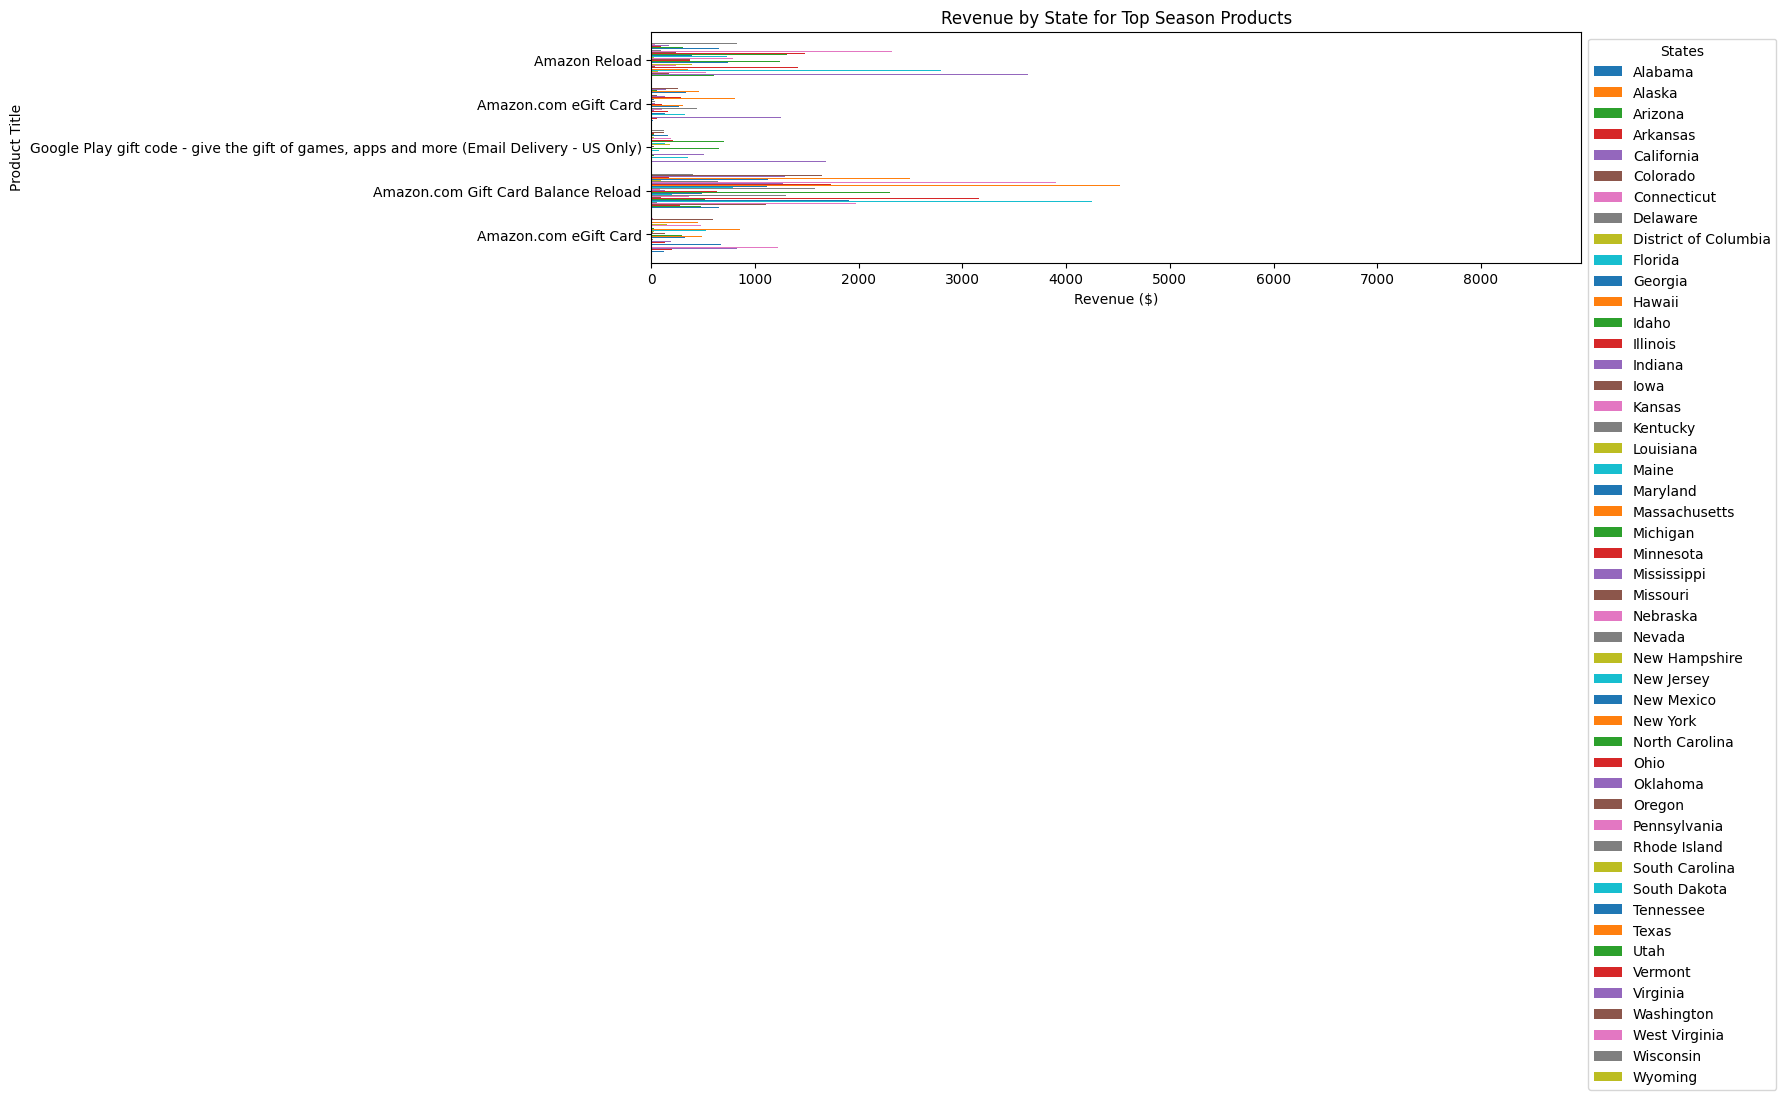

In [29]:
# State | Revenue | Chart
# need to fix this considering there are 50 states

state_rev_reset = state_rev.reset_index()

plot_df = state_rev_reset.set_index('Title')

state_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[state_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Revenue ($)')
ax.set_ylabel('Product Title')
ax.set_title('Revenue by State for Top Season Products')
ax.legend(title='States', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

<ipython-input-30-791d223f7586>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


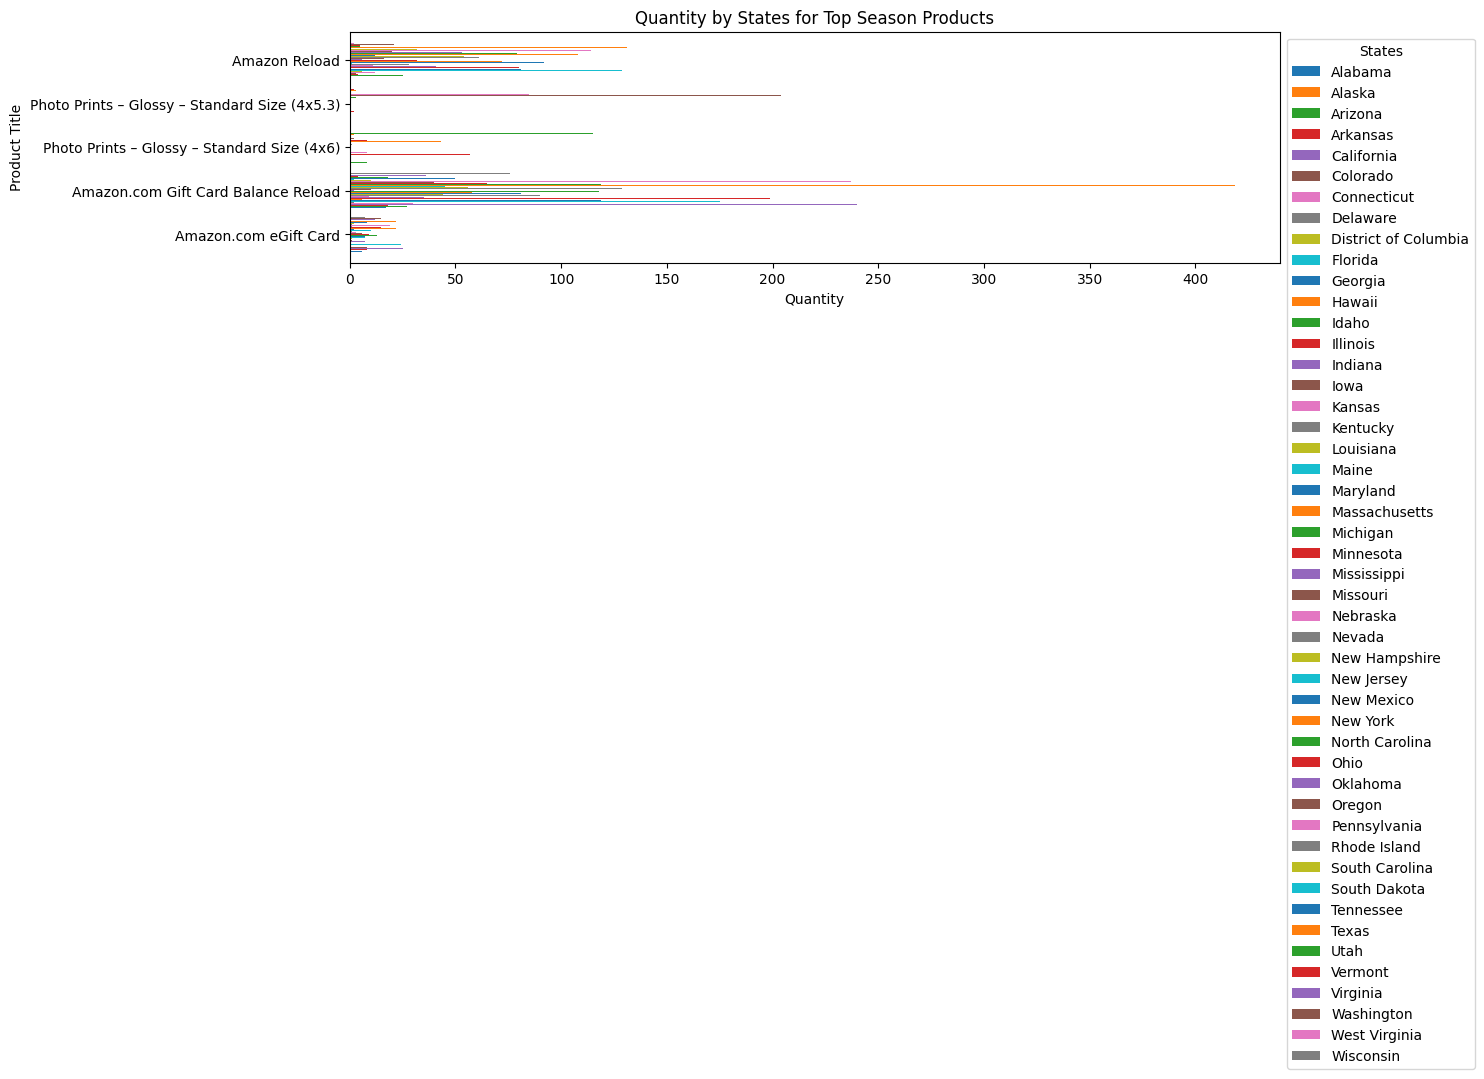

In [30]:
# State | Quantity | Chart

state_qty_reset = state_qty.reset_index()

plot_df = state_qty_reset.set_index('Title')

state_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
plot_df = plot_df[state_groups]

fig, ax = plt.subplots(figsize=(12, len(plot_df)*0.4 + 1))
plot_df.plot(kind='barh', ax=ax, width=0.8)
ax.set_xlabel('Quantity')
ax.set_ylabel('Product Title')
ax.set_title('Quantity by States for Top Season Products')
ax.legend(title='States', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Cleaning Amazon Gift Cards out

In [31]:
df_pr = pivot_revenue_filtered_total.copy()

is_gift = (
    df_pr['Title'].str.contains('Amazon', na=False) &
    df_pr['Title'].str.contains('Gift Card', na=False)
)
df_pr['IsGift'] = is_gift

df_no_gift = df_pr[~df_pr['IsGift']].copy()

df_no_gift['CV_SCORE'] = df_no_gift[season_cols].std(axis=1) / df_no_gift[season_cols].mean(axis=1)

df_no_gift = df_no_gift.sort_values('CV_SCORE', ascending=False)
df_no_gift



,ASIN/ISBN (Product Code),Fall,Spring,Summer,Winter,CV_SCORE,Title,IsGift
0,B0871WS93H,231.99,0.00,0.00,0.13,1.998507,"WestForce Electric Pressure Washer, 3000 PSI 1...",False
6,B0001TJ0WE,0.00,0.00,11.19,962.90,1.969485,"Herbal Conditioner for Normal Hair, with botan...",False
12,B08YP5MKY4,547.89,0.00,0.00,12.65,1.940287,"Kasa Smart Bulb, Dimmable Color Changing Light...",False
13,B01KIG1O8W,0.00,35.98,9.49,1822.09,1.935349,Baby Proofing Cabinet Locks for Babies [12 Pac...,False
14,B093RV4X4Z,0.00,385.00,0.00,10.00,1.933079,Growing Up in a Pandemic,False
...,...,...,...,...,...,...,...,...
45542,B07BWMJ8CC,139.98,139.98,139.98,139.98,0.000000,PMD Sports CG5 - Premium Creatine and L Glutam...,False
45539,B00SMBFZNG,78.99,78.99,78.99,78.99,0.000000,"VIZIO Sound Bar for TV, 29” Surround Sound Sys...",False
45540,B083XMC1D1,27.99,27.99,27.99,27.99,0.000000,BAGSMART Toiletry Bag Travel Bag with Hanging ...,False
45538,B07FV1G432,35.90,35.90,35.90,35.90,0.000000,"Rhodiola Rosea Supplement 500mg, 120 Vegan Cap...",False


In [32]:
df_pft = pivot_filtered_total.copy()

df_pft['Title'] = df_pft['Title'].fillna('').astype(str)

is_gift_qty = (
    df_pft['Title'].str.contains('Amazon', na=False) &
    df_pft['Title'].str.contains('Gift Card', na=False)
)

df_pft['IsGift'] = is_gift_qty

df_no_gift_pft = df_pft[~df_pft['IsGift']].copy()

df_no_gift_pft['CV_SCORE'] = df_no_gift_pft[season_cols].std(axis=1) / df_no_gift_pft[season_cols].mean(axis=1)

df_no_gift_pft = df_no_gift_pft.sort_values('CV_SCORE', ascending=False)
df_no_gift_pft


,ASIN/ISBN (Product Code),Fall,Spring,Summer,Winter,CV_SCORE,Title,IsGift
0,B093RV4X4Z,0.0,102.0,0.0,1.0,1.974195,Growing Up in a Pandemic,False
4,B00GHNJ1HC,0.0,1.0,0.0,31.0,1.917572,"EO Products Hand Sanitizer Spray for Everyone,...",False
5,B01KIG1O8W,0.0,2.0,1.0,91.0,1.915209,Baby Proofing Cabinet Locks for Babies [12 Pac...,False
6,B071R3H9WB,1.0,0.0,0.0,30.0,1.914945,"Casio FX 260 Solar II Scientific Calculator 5""...",False
8,B08YP5MKY4,24.0,0.0,0.0,1.0,1.894835,"Kasa Smart Bulb, Dimmable Color Changing Light...",False
...,...,...,...,...,...,...,...,...
24323,B07V4CW682,3.0,3.0,3.0,3.0,0.000000,NUDUKO Bamboo Toothbrushes (10 Pcs) BPA Free S...,False
24364,B016LDV41S,3.0,3.0,3.0,3.0,0.000000,"Swingline Paper Cutter, Guillotine Trimmer, 12...",False
24340,B07961C65H,6.0,6.0,6.0,6.0,0.000000,"Colgate Optic White Whitening Toothpaste, Spar...",False
24365,B00CEIECZ0,6.0,6.0,6.0,6.0,0.000000,"Maruchan Ramen Soy Sauce Flavor, 3.0 Oz, Pack ...",False


In [33]:
pivot_qty = df_no_gift_pft[season_cols]
pivot_rev = df_no_gift[season_cols]

ratio_pivot = pivot_rev.div(pivot_qty.replace(0, np.nan))
ratio_pivot = ratio_pivot.replace([np.inf, -np.inf], np.nan).fillna(0)

ratio_pivot['AVG_PRICE'] = (
    pivot_rev.sum(axis=1) / pivot_qty.sum(axis=1)
).replace([np.inf, -np.inf], 0)

ratio_pivot['CV_PRICE'] = ratio_pivot[season_cols].std(axis=1) / ratio_pivot[season_cols].mean(axis=1)

top_price = ratio_pivot.sort_values('AVG_PRICE', ascending=False).head(10)

top_cv_price = ratio_pivot.sort_values('CV_PRICE', ascending=False).head(10)

meta = df_no_gift[['ASIN/ISBN (Product Code)','Title']]
x = 0
full_price = meta.join(ratio_pivot).fillna(x)
full_price



,ASIN/ISBN (Product Code),Title,Fall,Spring,Summer,Winter,AVG_PRICE,CV_PRICE
0,B0871WS93H,"WestForce Electric Pressure Washer, 3000 PSI 1...",0.00,0.0,0.0000,0.130000,2.253592,2.0
6,B0001TJ0WE,"Herbal Conditioner for Normal Hair, with botan...",0.00,0.0,0.0000,32.096667,31.422258,2.0
12,B08YP5MKY4,"Kasa Smart Bulb, Dimmable Color Changing Light...",26.09,0.0,0.0000,0.000000,25.479091,2.0
13,B01KIG1O8W,Baby Proofing Cabinet Locks for Babies [12 Pac...,0.00,0.0,0.4745,0.000000,88.931429,2.0
14,B093RV4X4Z,Growing Up in a Pandemic,0.00,0.0,0.0000,0.000000,18.809524,0.0
...,...,...,...,...,...,...,...,...
45542,B07BWMJ8CC,PMD Sports CG5 - Premium Creatine and L Glutam...,0.00,0.0,0.0000,0.000000,0.000000,0.0
45539,B00SMBFZNG,"VIZIO Sound Bar for TV, 29” Surround Sound Sys...",0.00,0.0,0.0000,0.000000,0.000000,0.0
45540,B083XMC1D1,BAGSMART Toiletry Bag Travel Bag with Hanging ...,0.00,0.0,0.0000,0.000000,0.000000,0.0
45538,B07FV1G432,"Rhodiola Rosea Supplement 500mg, 120 Vegan Cap...",0.00,0.0,0.0000,0.000000,0.000000,0.0
